In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install git+https://github.com/ChristophReich1996/Swin-Transformer-V2

  Cloning https://github.com/ChristophReich1996/Swin-Transformer-V2 to /tmp/pip-req-build-o7yd528q
  Running command git clone --filter=blob:none --quiet https://github.com/ChristophReich1996/Swin-Transformer-V2 /tmp/pip-req-build-o7yd528q
  Resolved https://github.com/ChristophReich1996/Swin-Transformer-V2 to commit 7b74308bd560a5efabc0f9610d038dcf8e61226e
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.4 MB/s eta 0:00:00
  Created wheel for swin-transformer-v2: filename=swin_transformer_v2-0.1-py3-none-any.whl size=11083 sha256=67bacecf636a71eba27a2bbe4c2956066f7e74dc3ff928a53d92bad827115c95
  Stored in directory: /tmp/pip-ephem-wheel-cache-7futd_vq/wheels/32/75/e2/de10419d23bc7e671069a9513d00fe74fc8c15ef4972b62f7f
Successfully built swin-transformer-v2


In [ ]:
!pip install einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 1.5 MB/s eta 0:00:00


In [ ]:
# !pip uninstall tensorflow

In [ ]:
# pip uninstall keras


In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 999.1/999.1 kB 14.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.14.0 requires keras<2.15,>=2.14.0, but you have keras 3.0.1 which is incompatible.


In [ ]:
# !pip uninstall keras
# !pip uninstall tensorflow

# !pip install tensorflow
# !pip install keras


!pip install tensorflow --upgrade
!pip install keras --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 95.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 82.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 3.0.1
    Uninstalling keras-3.0.1:
      Successfully uninstalled keras-3.0.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.14.0
    Uninstalling tensorflow-2.14.0:
      Successfully un

In [ ]:
import tensorflow as tf
import numpy as np
import os
import time

import torch
import torch.nn as nn
import torch.nn.functional as F
import math
from einops import rearrange

# Initialize rng
rng = np.random.default_rng(2022)

import keras
from keras import layers
from keras import ops
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)




TensorFlow version: 2.15.0
Keras version: 3.0.1


In [ ]:
batch_size = 1 # This is a tunable hyperparameter
shape = (128, 128) # note we are reducing the size of the image
# Note: you will use 'grayscale' images for your own model
# but you might need to switch to 'rgb' for pretrained models because they are trained on ImageNet which has only RGB images
data_dir = '/content/drive/MyDrive/Final_Project/Dataset'
train_ds = tf.keras.utils.image_dataset_from_directory(os.path.join(data_dir, 'train/train'),
                                                       seed=rng.integers(500000),
                                                       image_size=shape,
                                                       label_mode="categorical",
                                                       color_mode='grayscale',
                                                       batch_size=batch_size)
train_ds_new = tf.keras.utils.image_dataset_from_directory(os.path.join(data_dir, 'train_new'),
                                                       seed=rng.integers(500000),
                                                       image_size=shape,
                                                       label_mode="categorical",
                                                       color_mode='grayscale',
                                                       batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(os.path.join(data_dir, 'validation/validation'),
                                                     seed=rng.integers(500000),
                                                     image_size=shape,
                                                     label_mode="categorical",
                                                     color_mode='grayscale',
                                                     batch_size=batch_size)
test_ds = tf.keras.utils.image_dataset_from_directory(os.path.join(data_dir, 'test_new'),
                                                      seed=rng.integers(500000),
                                                      image_size=shape,
                                                      label_mode="categorical",
                                                      color_mode='grayscale',
                                                      batch_size=batch_size)

Found 20000 files belonging to 4 classes.
Found 16000 files belonging to 4 classes.
Found 4000 files belonging to 4 classes.
Found 4000 files belonging to 4 classes.


In [ ]:
print(train_ds_new)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>


In [ ]:
def map_images_labels_to_numpy(image, onehot_label):
    return image, tf.argmax(onehot_label, axis=-1)

def ConvertToNumpy(ds_in):
  # Apply the mapping function to each element of the dataset
  new_dataset = ds_in.map(map_images_labels_to_numpy)

  # Initialize lists to store NumPy arrays
  X_train_list, y_train_list = [], []

  # Convert the dataset elements to NumPy arrays
  for image, label in new_dataset:
      # Assuming 'image' is a NumPy array with shape (128, 128, 1)
      # and 'label' is a NumPy array with shape () representing the class
      X_train_list.append(image.numpy())
      y_train_list.append(label.numpy())
      if len(y_train_list) % 100 == 0:
        break
        print(len(y_train_list))

  # Convert lists to NumPy arrays
  X_train = np.array(X_train_list)
  y_train = np.array(y_train_list)

  # Reshape the image array to the desired shape
  X_train = X_train.reshape((-1, 128, 128, 1))

  # Convert labels to integer type
  y_train = y_train.astype(np.int64)
  return X_train, y_train



In [ ]:
x_train, y_train = ConvertToNumpy(train_ds_new)
x_val, y_val = ConvertToNumpy(val_ds)
x_test, y_test = ConvertToNumpy(test_ds)

In [ ]:
# for x_val,y_val in val_ds.take(1):
print(x_train[0].shape)
#   print(y_val.shape)

(128, 128, 1)


In [ ]:
# for x_test,y_test in test_ds.take(1):
#   print(x_test.shape)
#   print(y_test.shape)

In [ ]:
num_classes = 4
input_shape = (128, 128, 1)

patch_size = (2, 2)  # 2-by-2 sized patches
dropout_rate = 0.03  # Dropout rate
num_heads = 8  # Attention heads
embed_dim = 4  # Embedding dimension
num_mlp = 4096  # MLP layer size

# Convert embedded patches to query, key, and values with a learnable additive
# value

qkv_bias = True
window_size = 2  # Size of attention window
shift_size = 1  # Size of shifting window
image_dimension = 128  # Initial image size

num_patch_x = input_shape[0] // patch_size[0]
num_patch_y = input_shape[1] // patch_size[1]

learning_rate = 1e-3
batch_size = 16
num_epochs = 40
validation_split = 0.1
weight_decay = 0.0001
label_smoothing = 0.1

x_train shape: (90, 128, 128, 1) - y_train shape: (90, 1, 4)
x_test shape: (100, 128, 128, 1) - y_test shape: (100, 1, 4)


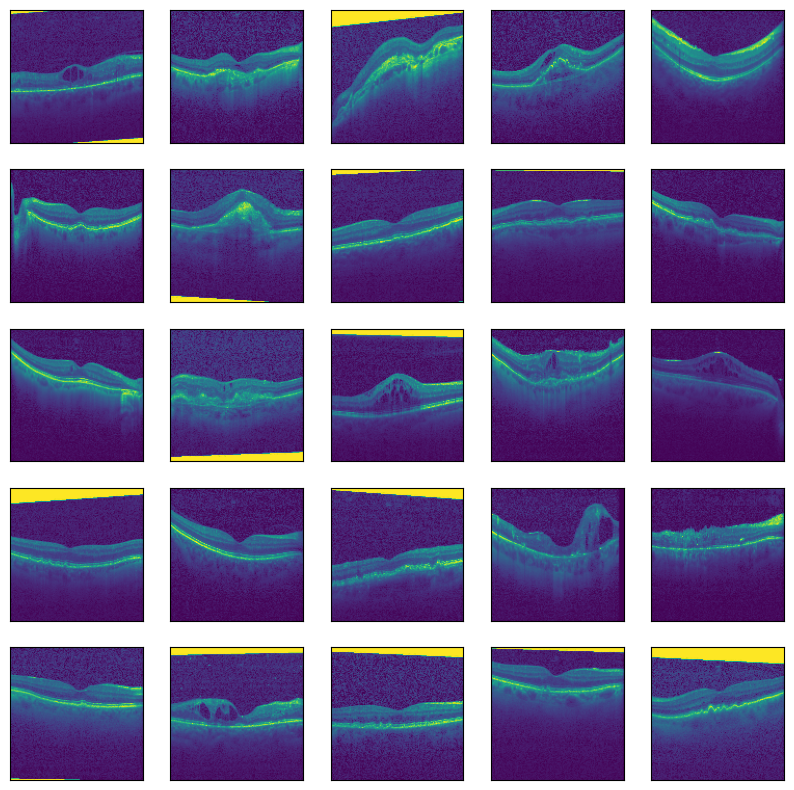

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.
y_train = keras.utils.to_categorical(tf.cast(y_train, dtype=tf.int32), num_classes)
y_test = keras.utils.to_categorical(tf.cast(y_test, dtype=tf.int32), num_classes)
num_train_samples = int(len(x_train) * (1 - validation_split))
num_val_samples = len(x_train) - num_train_samples

x_train, x_val = np.split(x_train, [num_train_samples])
y_train, y_val = np.split(y_train, [num_train_samples])

print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
plt.show()

In [ ]:
def window_partition(x, window_size):
    _, height, width, channels = x.shape
    patch_num_y = height // window_size
    patch_num_x = width // window_size
    x = keras.ops.reshape(
        x,
        (
            -1,
            patch_num_y,
            window_size,
            patch_num_x,
            window_size,
            channels,
        ),
    )
    x = keras.ops.transpose(x, (0, 1, 3, 2, 4, 5))
    windows = keras.ops.reshape(x, (-1, window_size, window_size, channels))
    return windows


def window_reverse(windows, window_size, height, width, channels):
    patch_num_y = height // window_size
    patch_num_x = width // window_size
    x = keras.ops.reshape(
        windows,
        (
            -1,
            patch_num_y,
            patch_num_x,
            window_size,
            window_size,
            channels,
        ),
    )
    x = keras.ops.transpose(x, (0, 1, 3, 2, 4, 5))
    x = keras.ops.reshape(x, (-1, height, width, channels))
    return x

In [ ]:
class WindowAttention(layers.Layer):
    def __init__(
        self,
        dim,
        window_size,
        num_heads,
        qkv_bias=True,
        dropout_rate=0.0,
        **kwargs,
    ):
        super().__init__(**kwargs)
        self.dim = dim
        self.window_size = window_size
        self.num_heads = num_heads
        self.scale = (dim // num_heads) ** -0.5
        self.qkv = layers.Dense(dim * 3, use_bias=qkv_bias)
        self.dropout = layers.Dropout(dropout_rate)
        self.proj = layers.Dense(dim)

        num_window_elements = (2 * self.window_size[0] - 1) * (
            2 * self.window_size[1] - 1
        )
        self.relative_position_bias_table = self.add_weight(
            shape=(num_window_elements, self.num_heads),
            initializer=keras.initializers.Zeros(),
            trainable=True,
        )
        coords_h = np.arange(self.window_size[0])
        coords_w = np.arange(self.window_size[1])
        coords_matrix = np.meshgrid(coords_h, coords_w, indexing="ij")
        coords = np.stack(coords_matrix)
        coords_flatten = coords.reshape(2, -1)
        relative_coords = coords_flatten[:, :, None] - coords_flatten[:, None, :]
        relative_coords = relative_coords.transpose([1, 2, 0])
        relative_coords[:, :, 0] += self.window_size[0] - 1
        relative_coords[:, :, 1] += self.window_size[1] - 1
        relative_coords[:, :, 0] *= 2 * self.window_size[1] - 1
        relative_position_index = relative_coords.sum(-1)

        self.relative_position_index = keras.Variable(
            initializer=relative_position_index,
            shape=relative_position_index.shape,
            dtype="int",
            trainable=False,
        )

    def call(self, x, mask=None):
        _, size, channels = x.shape
        head_dim = channels // self.num_heads
        x_qkv = self.qkv(x)
        x_qkv = keras.ops.reshape(x_qkv, (-1, size, 3, self.num_heads, head_dim))
        x_qkv = keras.ops.transpose(x_qkv, (2, 0, 3, 1, 4))
        q, k, v = x_qkv[0], x_qkv[1], x_qkv[2]
        q = q * self.scale
        k = keras.ops.transpose(k, (0, 1, 3, 2))
        attn = q @ k

        num_window_elements = self.window_size[0] * self.window_size[1]
        relative_position_index_flat = keras.ops.reshape(self.relative_position_index, (-1,))
        relative_position_bias = keras.ops.take(
            self.relative_position_bias_table,
            relative_position_index_flat,
            axis=0,
        )
        relative_position_bias = keras.ops.reshape(
            relative_position_bias,
            (num_window_elements, num_window_elements, -1),
        )
        relative_position_bias = keras.ops.transpose(relative_position_bias, (2, 0, 1))
        attn = attn + keras.ops.expand_dims(relative_position_bias, axis=0)

        if mask is not None:
            nW = mask.shape[0]
            mask_float = keras.ops.cast(
                keras.ops.expand_dims(ops.expand_dims(mask, axis=1), axis=0),
                "float32",
            )
            attn = keras.ops.reshape(attn, (-1, nW, self.num_heads, size, size)) + mask_float
            attn = keras.ops.reshape(attn, (-1, self.num_heads, size, size))
            attn = keras.activations.softmax(attn, axis=-1)
        else:
            attn = keras.activations.softmax(attn, axis=-1)
        attn = self.dropout(attn)

        x_qkv = attn @ v
        x_qkv = keras.ops.transpose(x_qkv, (0, 2, 1, 3))
        x_qkv = keras.ops.reshape(x_qkv, (-1, size, channels))
        x_qkv = self.proj(x_qkv)
        x_qkv = self.dropout(x_qkv)
        return x_qkv


In [ ]:
class SwinTransformer(layers.Layer):
    def __init__(
        self,
        dim,
        num_patch,
        num_heads,
        window_size=7,
        shift_size=0,
        num_mlp=1024,
        qkv_bias=True,
        dropout_rate=0.0,
        **kwargs,
    ):
        super().__init__(**kwargs)

        self.dim = dim  # number of input dimensions
        self.num_patch = num_patch  # number of embedded patches
        self.num_heads = num_heads  # number of attention heads
        self.window_size = window_size  # size of window
        self.shift_size = shift_size  # size of window shift
        self.num_mlp = num_mlp  # number of MLP nodes

        self.norm1 = layers.LayerNormalization(epsilon=1e-5)
        self.attn = WindowAttention(
            dim,
            window_size=(self.window_size, self.window_size),
            num_heads=num_heads,
            qkv_bias=qkv_bias,
            dropout_rate=dropout_rate,
        )
        self.drop_path = layers.Dropout(dropout_rate)
        self.norm2 = layers.LayerNormalization(epsilon=1e-5)

        self.mlp = keras.Sequential(
            [
                layers.Dense(num_mlp),
                layers.Activation(keras.activations.gelu),
                layers.Dropout(dropout_rate),
                layers.Dense(dim),
                layers.Dropout(dropout_rate),
            ]
        )

        if min(self.num_patch) < self.window_size:
            self.shift_size = 0
            self.window_size = min(self.num_patch)

    def build(self, input_shape):
        if self.shift_size == 0:
            self.attn_mask = None
        else:
            height, width = self.num_patch
            h_slices = (
                slice(0, -self.window_size),
                slice(-self.window_size, -self.shift_size),
                slice(-self.shift_size, None),
            )
            w_slices = (
                slice(0, -self.window_size),
                slice(-self.window_size, -self.shift_size),
                slice(-self.shift_size, None),
            )
            mask_array = np.zeros((1, height, width, 1))
            count = 0
            for h in h_slices:
                for w in w_slices:
                    mask_array[:, h, w, :] = count
                    count += 1
            mask_array = keras.ops.convert_to_tensor(mask_array)

            # mask array to windows
            mask_windows = window_partition(mask_array, self.window_size)
            mask_windows = keras.ops.reshape(
                mask_windows, [-1, self.window_size * self.window_size]
            )
            attn_mask = keras.ops.expand_dims(mask_windows, axis=1) - keras.ops.expand_dims(
                mask_windows, axis=2
            )
            attn_mask = keras.ops.where(attn_mask != 0, -100.0, attn_mask)
            attn_mask = keras.ops.where(attn_mask == 0, 0.0, attn_mask)
            self.attn_mask = keras.Variable(
                initializer=attn_mask,
                shape=attn_mask.shape,
                dtype=attn_mask.dtype,
                trainable=False,
            )

    def compute_output_shape(self, input_shape):
        return input_shape  # Adjust this if needed

    def call(self, x, training=False):
            height, width = self.num_patch
            _, num_patches_before, channels = x.shape
            x_skip = x
            x = self.norm1(x)
            x = keras.ops.reshape(x, (-1, height, width, channels))
            if self.shift_size > 0:
                shifted_x = keras.ops.roll(
                    x, shift=[-self.shift_size, -self.shift_size], axis=[1, 2]
                )
            else:
                shifted_x = x

            x_windows = window_partition(shifted_x, self.window_size)
            x_windows = keras.ops.reshape(
                x_windows, (-1, self.window_size * self.window_size, channels)
            )
            attn_windows = self.attn(x_windows, mask=self.attn_mask)

            attn_windows = keras.ops.reshape(
                attn_windows,
                (-1, self.window_size, self.window_size, channels),
            )
            shifted_x = window_reverse(
                attn_windows, self.window_size, height, width, channels
            )
            if self.shift_size > 0:
                x = keras.ops.roll(
                    shifted_x, shift=[self.shift_size, self.shift_size], axis=[1, 2]
                )
            else:
                x = shifted_x

            x = keras.ops.reshape(x, (-1, height * width, channels))
            x = self.drop_path(x, training=training)
            x = x_skip + x
            x_skip = x
            x = self.norm2(x)
            x = self.mlp(x)
            x = self.drop_path(x)
            x = x_skip + x
            return x


In [ ]:
# Using tf ops since it is only used in tf.data.
def patch_extract(images):
    batch_size = tf.shape(images)[0]
    patches = tf.image.extract_patches(
        images=images,
        sizes=(1, patch_size[0], patch_size[1], 1),
        strides=(1, patch_size[0], patch_size[1], 1),
        rates=(1, 1, 1, 1),
        padding="VALID",
    )
    patch_dim = patches.shape[-1]
    patch_num = patches.shape[1]
    return tf.reshape(patches, (batch_size, patch_num * patch_num, patch_dim))


class PatchEmbedding(layers.Layer):
    def __init__(self, num_patch, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.num_patch = num_patch
        self.proj = layers.Dense(embed_dim)
        self.pos_embed = layers.Embedding(input_dim=num_patch, output_dim=embed_dim)

    def call(self, patch):
        pos = keras.ops.arange(start=0, stop=self.num_patch)
        return self.proj(patch) + self.pos_embed(pos)


class PatchMerging(keras.layers.Layer):
    def __init__(self, num_patch, embed_dim):
        super().__init__()
        self.num_patch = num_patch
        self.embed_dim = embed_dim
        self.linear_trans = layers.Dense(2 * embed_dim, use_bias=False)

    def compute_output_shape(self, input_shape):
        return input_shape  # Adjust this if needed


    def call(self, x):
        height, width = self.num_patch
        _, _, C = x.shape
        x = keras.ops.reshape(x, (-1, height, width, C))
        x0 = x[:, 0::2, 0::2, :]
        x1 = x[:, 1::2, 0::2, :]
        x2 = x[:, 0::2, 1::2, :]
        x3 = x[:, 1::2, 1::2, :]
        x = keras.ops.concatenate((x0, x1, x2, x3), axis=-1)
        x = keras.ops.reshape(x, (-1, (height // 2) * (width // 2), 4 * C))
        return self.linear_trans(x)

In [ ]:
def augment(x):
    x = tf.image.random_crop(x, size=(image_dimension, image_dimension, 1))
    x = tf.image.random_flip_left_right(x)
    return x



dataset = (
    tf.data.Dataset.from_tensor_slices((x_train, y_train))
    .map(lambda x, y: (augment(x), y))
    .batch(batch_size=batch_size)
    .map(lambda x, y: (patch_extract(x), y))
    .prefetch(tf.data.experimental.AUTOTUNE)
)

dataset_val = (
    tf.data.Dataset.from_tensor_slices((x_val, y_val))
    .batch(batch_size=batch_size)
    .map(lambda x, y: (patch_extract(x), y))
    .prefetch(tf.data.experimental.AUTOTUNE)
)

dataset_test = (
    tf.data.Dataset.from_tensor_slices((x_test, y_test))
    .batch(batch_size=batch_size)
    .map(lambda x, y: (patch_extract(x), y))
    .prefetch(tf.data.experimental.AUTOTUNE)
)

In [ ]:
input = layers.Input(shape=(4096, 4))
print(embed_dim)
x = PatchEmbedding(4096, embed_dim)(input)
x = SwinTransformer(
    dim=embed_dim,
    num_patch=(num_patch_x, num_patch_y),
    num_heads=num_heads,
    window_size=window_size,
    shift_size=0,
    num_mlp=num_mlp,
    qkv_bias=qkv_bias,
    dropout_rate=dropout_rate,
)(x, training=False)
x = SwinTransformer(
    dim=embed_dim,
    num_patch=(num_patch_x, num_patch_y),
    num_heads=num_heads,
    window_size=window_size,
    shift_size=shift_size,
    num_mlp=num_mlp,
    qkv_bias=qkv_bias,
    dropout_rate=dropout_rate,
)(x, training=False)
x = PatchMerging((num_patch_x, num_patch_y), embed_dim=embed_dim)(x)
x = layers.GlobalAveragePooling1D()(x)
output = layers.Dense(num_classes, activation="softmax")(x)

4


ZeroDivisionError: ignored

In [ ]:
# Print the shape of the first batch of data
for x_batch, y_batch in dataset.take(1):
    print("Input shape:", x_batch.shape)
    print("Output shape:", y_batch.shape)


Input shape: (16, 4096, 4)
Output shape: (16, 1, 4)


In [ ]:
model = keras.Model(input, output)
model.summary()
model.compile(
    loss=keras.losses.CategoricalCrossentropy(label_smoothing=label_smoothing),
    optimizer=keras.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    ),
    metrics=[
        keras.metrics.CategoricalAccuracy(name="accuracy"),
        keras.metrics.TopKCategoricalAccuracy(5, name="top-5-accuracy"),
    ],
)


history = model.fit(
    dataset,
    batch_size=batch_size,
    epochs=num_epochs,
    validation_data=dataset_val,
)

Model: "functional_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ input_layer_49 (InputLayer)        │ (None, 4096, 64)              │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ patch_embedding_36                 │ (None, 4096, 64)              │     266,304 │
│ (PatchEmbedding)                   │                               │             │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ swin_transformer_44                │ (None, 4096, 64)              │          88 │
│ (SwinTransformer)                  │                               │             │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ swin_transformer_45                │ (None, 4096, 64)              │      16,472 │
│ (SwinTransformer)                  │                               │             │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ patch_merging_21 (PatchMerging)    │ (None, 4096, 64)              │      32,768 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ global_average_pooling1d_15        │ (None, 64)                    │           0 │
│ (GlobalAveragePooling1D)           │                               │             │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_248 (Dense)                  │ (None, 4)                     │         260 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 315,892 (1.27 MB)

 Trainable params: 299,476 (1.14 MB)

 Non-trainable params: 16,416 (128.25 KB)

Epoch 1/40


ValueError: ignored

In [ ]:
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and Validation Losses Over Epochs", fontsize=14)
plt.legend()
plt.grid()
plt.show()

In [ ]:
loss, accuracy, top_5_accuracy = model.evaluate(dataset_test)
print(f"Test loss: {round(loss, 2)}")
print(f"Test accuracy: {round(accuracy * 100, 2)}%")
print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")